# Cy Gilman Project Analysis

In [319]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from numpy.linalg import inv


from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from datetime import datetime
months =[datetime(2019, imon, 1) for imon in np.arange(1,12+1)]
month_str = [date_obj.strftime('%b') for date_obj in months]
m_str = [w[0] for w in month_str];

def fix_calendar(ds, timevar='T'):
    if ds[timevar].attrs['calendar'] == '360':
        ds[timevar].attrs['calendar'] = '360_day'
    return ds

def cor(x,y):
    return np.nansum(x*y, axis = 0)/np.sqrt(np.nansum(x**2)*np.nansum(y**2))

# Get color order
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

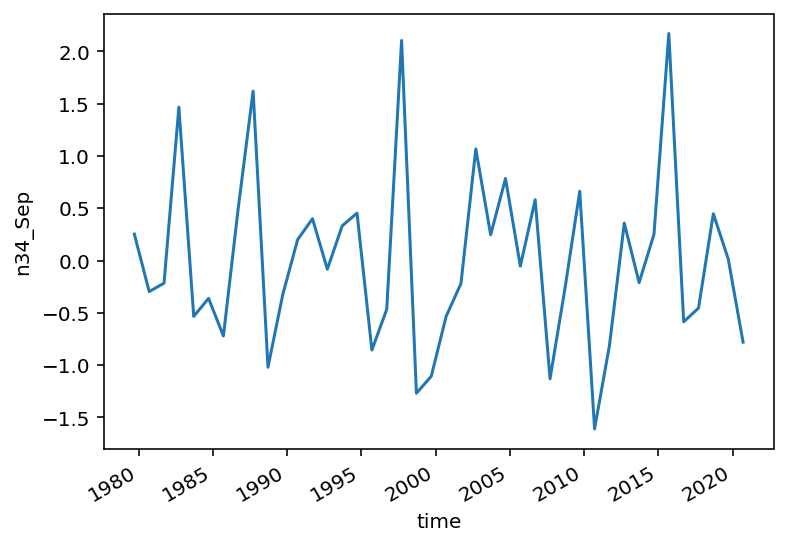

In [362]:
# Sep Nino 3.4
n34_Sep_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.n34_Sep/dods'
n34_Sep_ds = xr.open_dataset(n34_Sep_url)
n34_Sep = n34_Sep_ds.n34_Sep - n34_Sep_ds.n34_Sep.mean('T')
n34_Sep.plot();
n34_Sep_cut = n34_Sep[:-1]

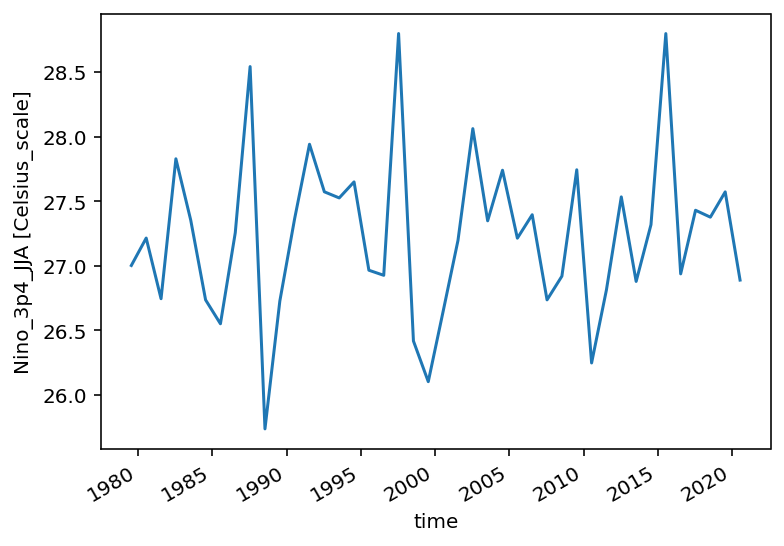

In [321]:
# Read JJA Nino 3.4
n34_JJA_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.n34_JJA/dods'
n34_JJA_ds = xr.open_dataset(n34_JJA_url)
n34_JJA = n34_JJA_ds.n34_JJA
n34_JJA.plot();

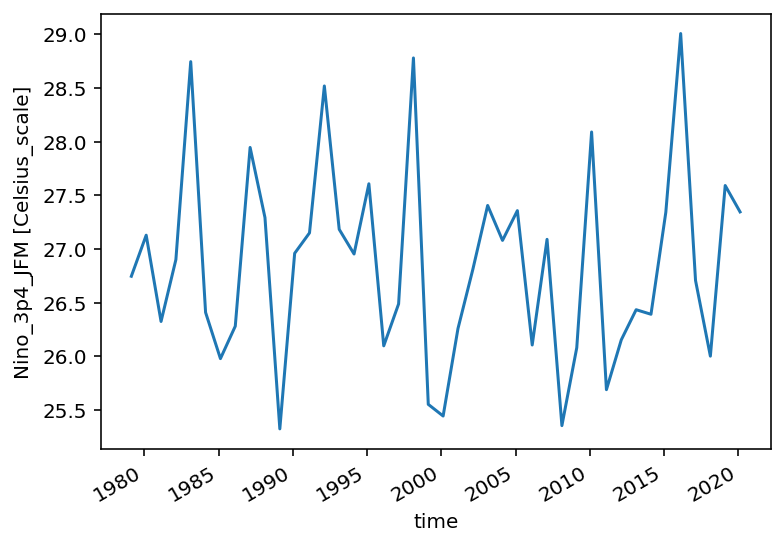

In [322]:
# JFM Nino 3.4
n34_JFM_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.n34_JFM/dods'
n34_JFM_ds = xr.open_dataset(n34_JFM_url)
n34_JFM = n34_JFM_ds.n34_JFM
n34_JFM.plot();

#### ECMWF-IFS-Cy41r2:

<ipython-input-323-87f24af8c40f>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


Text(0.5, 1.0, 'ECMWF Monthly Snowfall Flux Data')

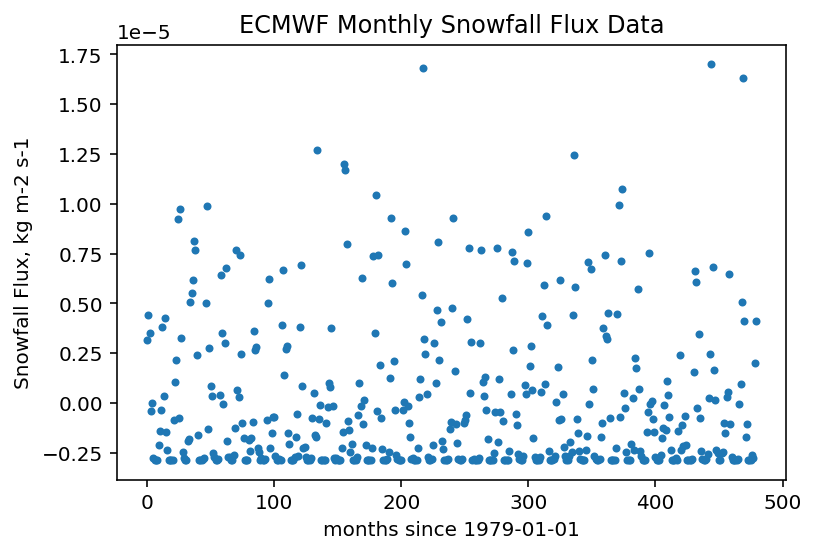

In [323]:
ecmwf = xr.open_dataset('Data/data.nc', decode_times=False)
ecmwf = fix_calendar(ecmwf)
ecmwf = xr.decode_cf(ecmwf)
ecmwf_array = ecmwf.to_array()
ecmwf_array = ecmwf_array.mean(dim = 'variable')
ecmwf_mean = ecmwf_array.mean(dim = 'T')
ecmwf_a = ecmwf_array - ecmwf_mean
ecmwf_a_plot = ecmwf_a.mean(axis = (1,2))

plt.plot(ecmwf_a_plot,'.', )
ax = plt.subplot()
ax.set_xlabel('months since 1979-01-01')
ax.set_ylabel('Snowfall Flux, kg m-2 s-1')
ax.set_title('ECMWF Monthly Snowfall Flux Data')

Text(0.5, 1.0, 'Average Seasonal Snowfall Flux Data')

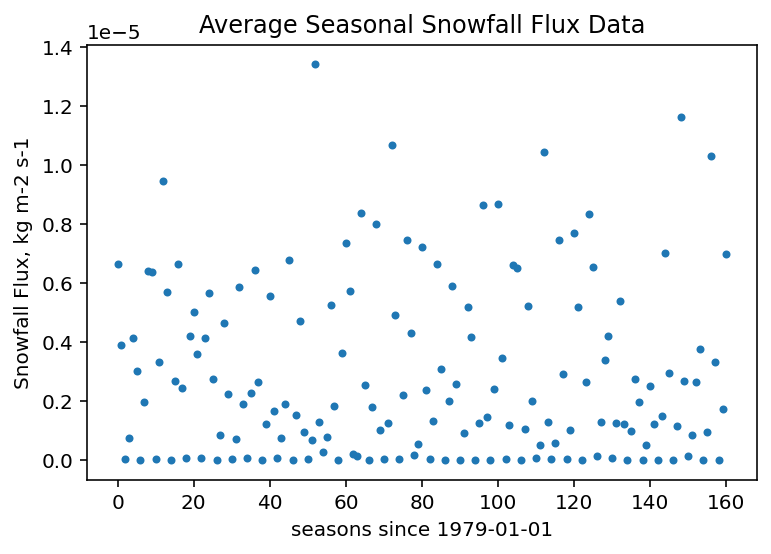

In [324]:
ecmwf_sn = ecmwf.resample(T = 'QS-DEC', closed = 'left', keep_attrs = True, restore_coord_dims = True).mean()
ecmwf_sn_array = ecmwf_sn.to_array()
ecmwf_sn_array = ecmwf_sn_array.mean(dim = 'variable')
ecmwf_sn_plot = ecmwf_sn_array.mean(axis = (1,2))
ecmwf_sn_climatology = ecmwf_sn_plot.groupby("T.month").mean()
ecmwf_sn_a_plot = ecmwf_sn_plot.groupby("T.month") - ecmwf_sn_climatology
ecmwf_sn_a = ecmwf_sn_array.groupby("T.month") - ecmwf_sn_climatology

fig, axs = plt.subplots(figsize = (6,4))
plt.plot(ecmwf_sn_plot, '.')
plt.xlabel('seasons since 1979-01-01');
plt.ylabel('Snowfall Flux, kg m-2 s-1')
plt.title('Average Seasonal Snowfall Flux Data')


Text(0, 0.5, 'Snowfall Flux, kg m-2 s-1')

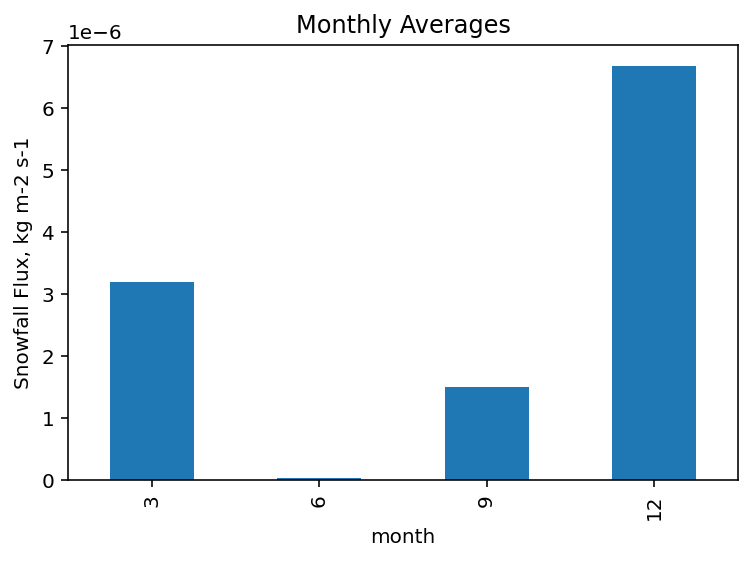

In [325]:
#Seasonal Averages
ecmwf_sn_climatology.to_series().plot.bar();
plt.title('Monthly Averages')
plt.ylabel('Snowfall Flux, kg m-2 s-1')


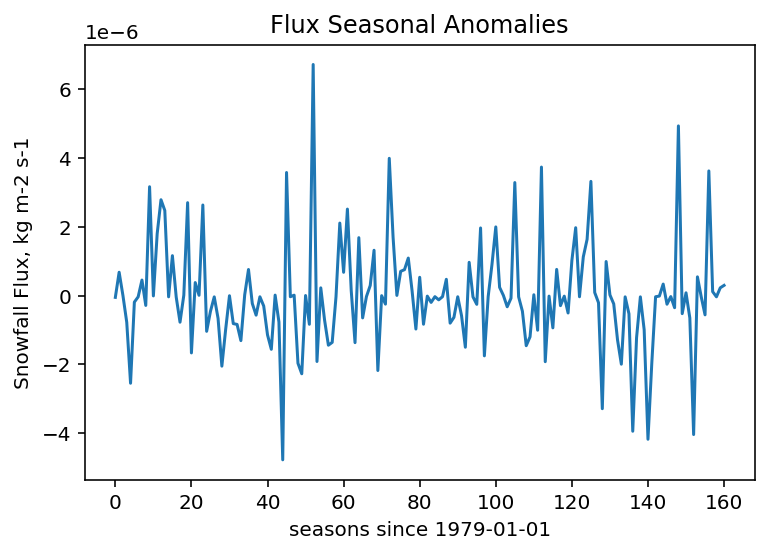

In [326]:
#Anomalies for each season
plt.plot(ecmwf_sn_a_plot)
plt.title('Flux Seasonal Anomalies')
plt.ylabel('Snowfall Flux, kg m-2 s-1')
plt.xlabel('seasons since 1979-01-01');

Text(0.5, 1.0, 'Seasonal Flux Anomaly Autocorrelation')

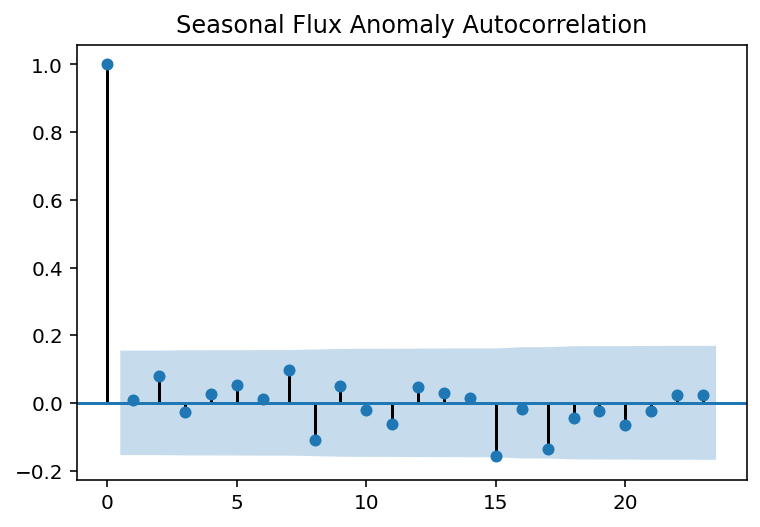

In [327]:
#Seasonal Anomalies almost completely random
plot_acf(ecmwf_sn_a_plot)
plt.title('Seasonal Flux Anomaly Autocorrelation')

<ipython-input-360-0e97115c4dad>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


Text(0, 0.5, 'Snowfall Flux, kg m-2 s-1')

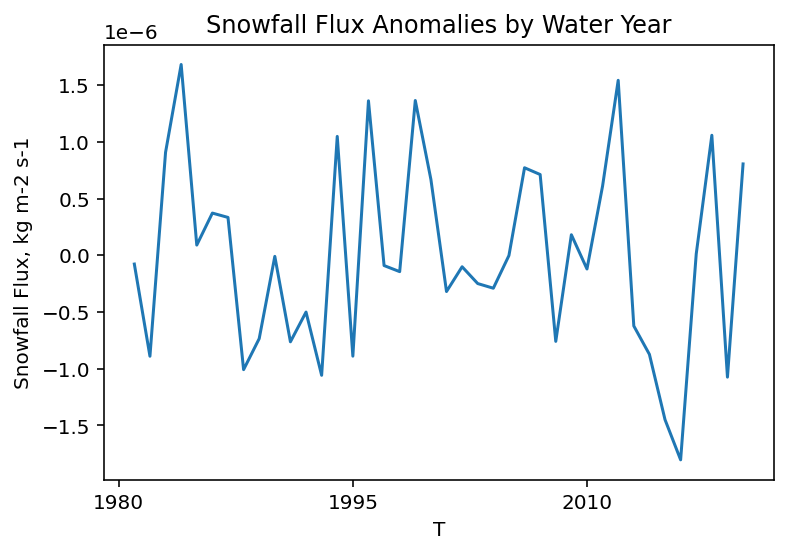

In [360]:
#encoding a "water year"
ecmwf_shift = ecmwf.shift(T=3)
ecmwf_wyr = ecmwf_shift.resample(T = 'Y', closed = 'right', keep_attrs = True, restore_coord_dims = True).mean()
ecmwf_wyr_array = ecmwf_wyr.to_array()
ecmwf_wyr_array = ecmwf_wyr_array.mean(dim = 'variable')
ecmwf_wyr_a = ecmwf_wyr_array - ecmwf_mean
ecmwf_wyr_a_plot = ecmwf_wyr_a.mean(axis = (1,2))

ecmwf_wyr_a_plot.plot()
ax = plt.subplot()
ax.set_title('Snowfall Flux Anomalies by Water Year')
ax.set_ylabel('Snowfall Flux, kg m-2 s-1')

In [366]:
#average correlations with Nino 3.4
ecmwf_sn_a_plot_groups = ecmwf_sn_a_plot.groupby('T.month').groups
ecmwf_winter_average = ecmwf_sn_a_plot[ecmwf_sn_a_plot_groups[12]]
n34_Sep_cut = n34_Sep[:-1]
n34_Sep_2cut = n34_Sep[:-2]
n34_JJA_cut = n34_JJA[:-2]
n34_JFM_cut = n34_JFM[1:-1]
n34_JFM_half_cut = n34_JFM[1:]


print(cor(ecmwf_winter_average.values, n34_Sep_cut.values))
print(cor(ecmwf_wyr_a_plot.values, n34_JJA_cut.values))
print(cor(ecmwf_wyr_a_plot.values, n34_Sep_2cut.values))
print(cor(ecmwf_wyr_a_plot.values, n34_JFM_cut.values))
print(cor(ecmwf_winter_average.values, n34_JFM_half_cut.values))
2/np.sqrt(ecmwf_winter_average.values.size)

0.041131219309373336
-0.008582343
0.029964720190378345
-0.004818869
0.0039696973


0.31234752377721214

In [331]:
#Correlation between winter data and Sep Nino 3.4, distributed spatially
ecmwf_sn_a_plot_groups = ecmwf_sn_a.groupby('T.month').groups
ecmwf_winter = ecmwf_sn_a[ecmwf_sn_a_plot_groups[12]]
n34_Sep_cut_expanded = n34_Sep_cut.values[:, np.newaxis, np.newaxis]
n34_Sep_ecmwf_corr = np.nansum(n34_Sep_cut_expanded*ecmwf_winter.values, axis = 0)/(np.sqrt(np.nansum(n34_Sep_cut_expanded**2)*np.nansum(ecmwf_winter**2)))

In [332]:
#Correlation between water-year data and JJA/Sep Nino 3.4, distributed spatially
n34_JJA_cut_expanded = n34_JJA_cut.values[:, np.newaxis, np.newaxis]
n34_Sep_2cut_expanded = n34_Sep_2cut.values[:,np.newaxis, np.newaxis]
n34_JJA_ecmwf_corr = np.nansum(n34_JJA_cut_expanded*ecmwf_wyr_a.values, axis = 0)/(np.sqrt(np.nansum(n34_JJA_cut_expanded**2)*np.nansum(ecmwf_wyr_a**2)))
n34_Sep_ecmwf_yr_corr = np.nansum(n34_Sep_2cut_expanded*ecmwf_wyr_a.values, axis = 0)/(np.sqrt(np.nansum(n34_Sep_2cut_expanded**2)*np.nansum(ecmwf_wyr_a**2)))

Text(0.5, 1.0, 'Average Snowfall Flux')

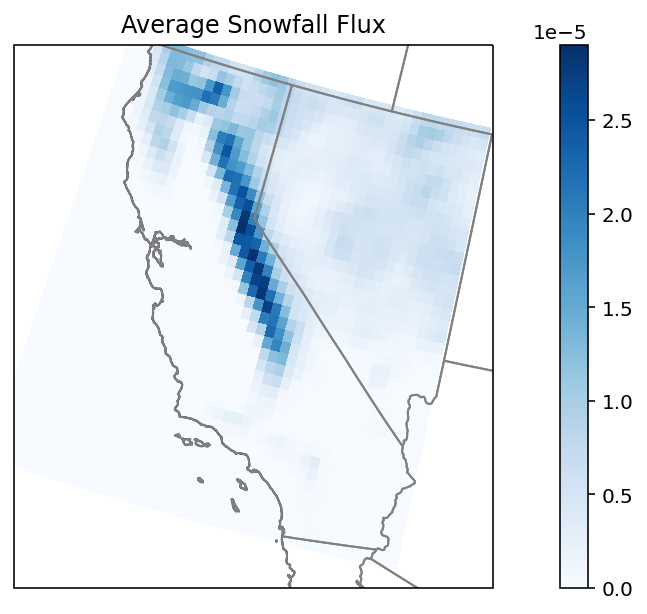

In [333]:
#Graph 1: Average Snowfall Flux over time
proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-124, -114, 32, 42]

xr.plot.pcolormesh(ecmwf_mean,transform=proj_dta, ax = ax, cmap='Blues')
ax.coastlines();
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_extent(extent)
ax.set_title('Average Snowfall Flux')


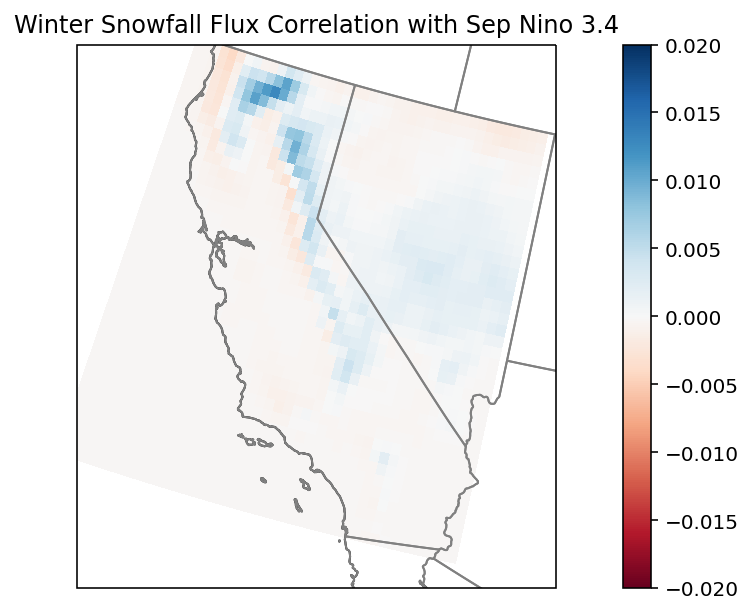

In [334]:
#Graph 2: Winter Snowfall Flux Correlation with Sep Nino 3.4
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-124, -114, 32, 42]

plt.pcolormesh(ecmwf_mean.X, ecmwf_mean.Y, n34_Sep_ecmwf_corr, transform=proj_dta, vmin = -0.02, vmax = 0.02, cmap = 'RdBu')
ax.coastlines();
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_extent(extent)
ax.set_title('Winter Snowfall Flux Correlation with Sep Nino 3.4')
plt.colorbar()

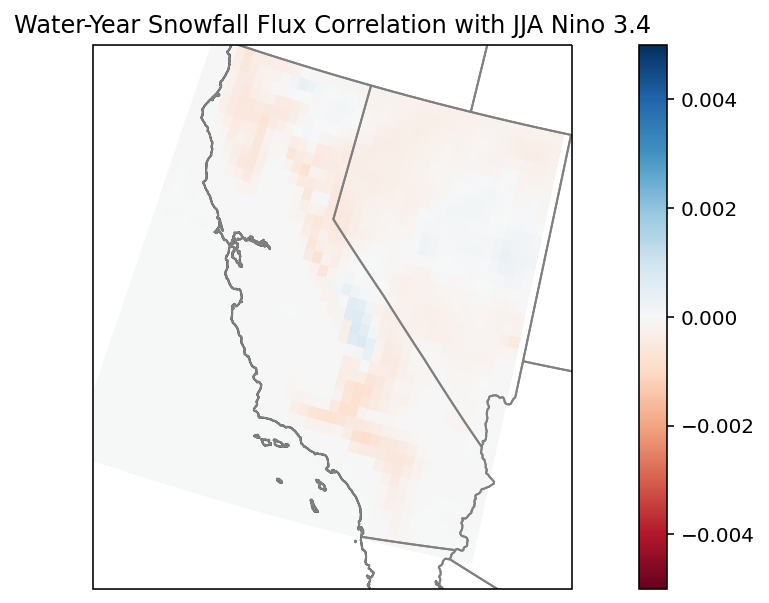

In [335]:
#Graph 3: Water-Year Snowfall Flux Correlation with JJA Nino 3.4
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-124, -114, 32, 42]

plt.pcolormesh(ecmwf_mean.X, ecmwf_mean.Y,n34_JJA_ecmwf_corr,transform=proj_dta, vmin = -0.005, vmax = 0.005, cmap = 'RdBu')
ax.coastlines();
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_extent(extent)
ax.set_title('Water-Year Snowfall Flux Correlation with JJA Nino 3.4')

plt.colorbar()

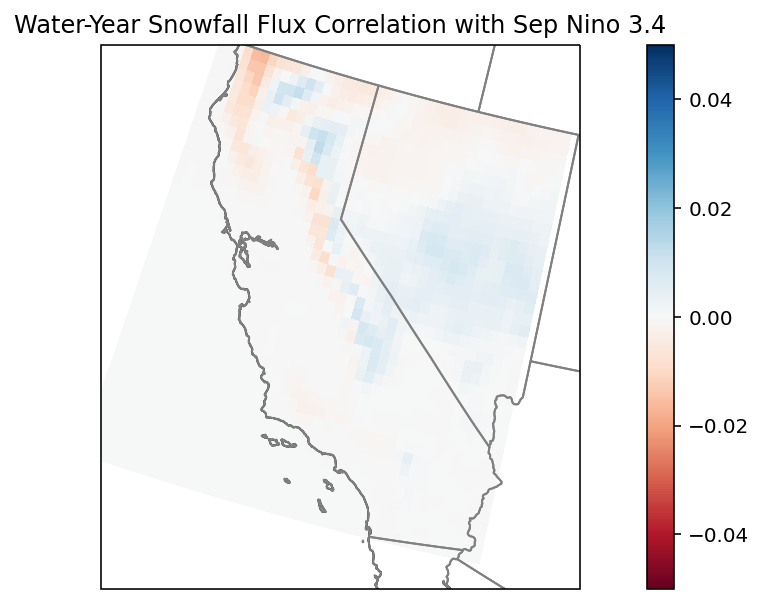

In [336]:
#Graph 4: Water-Year Snowfall Flux Correlation with Sep Nino 3.4
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-124, -114, 32, 42]

plt.pcolormesh(ecmwf_mean.X, ecmwf_mean.Y, n34_Sep_ecmwf_yr_corr,transform=proj_dta, vmin = -0.05, vmax = 0.05, cmap = 'RdBu')
ax.coastlines();
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_extent(extent)
ax.set_title('Water-Year Snowfall Flux Correlation with Sep Nino 3.4')
plt.colorbar()

In [337]:
#KNN Prediction, using water year data and JJA Nino 3.4
K = 10
knn_list = np.argsort((n34_JJA_cut - n34_JJA[-2])**2)
knn = knn_list[:K].values
knn_forecast_ecmwf = ecmwf_wyr_array[knn].mean(dim = 'T')

Text(0.5, 1.0, 'KNN Flux Snowfall Predicted Value')

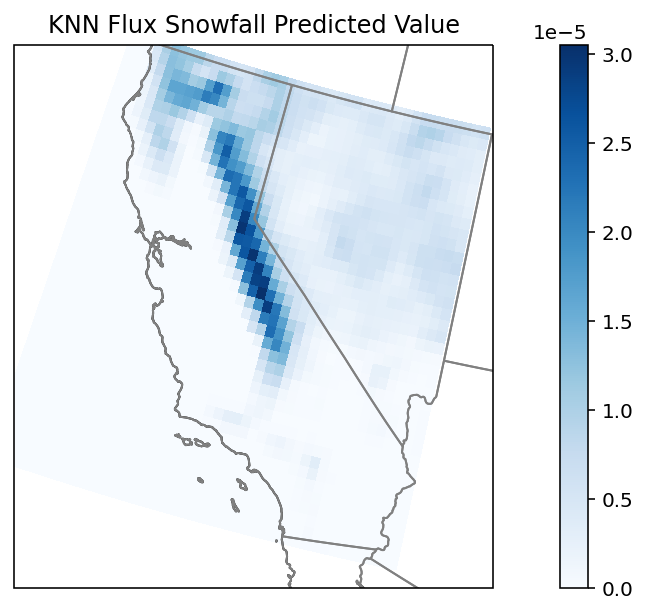

In [363]:
#Graph 4: KNN Mean Prediction Map
proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-124, -114, 32, 42]

xr.plot.pcolormesh(knn_forecast_ecmwf,transform=proj_dta, ax = ax, cmap='Blues')
ax.coastlines();
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_extent(extent)
ax.set_title('KNN Flux Snowfall Predicted Value')

Text(0.5, 1.0, 'KNN Predicted Anomaly Map')

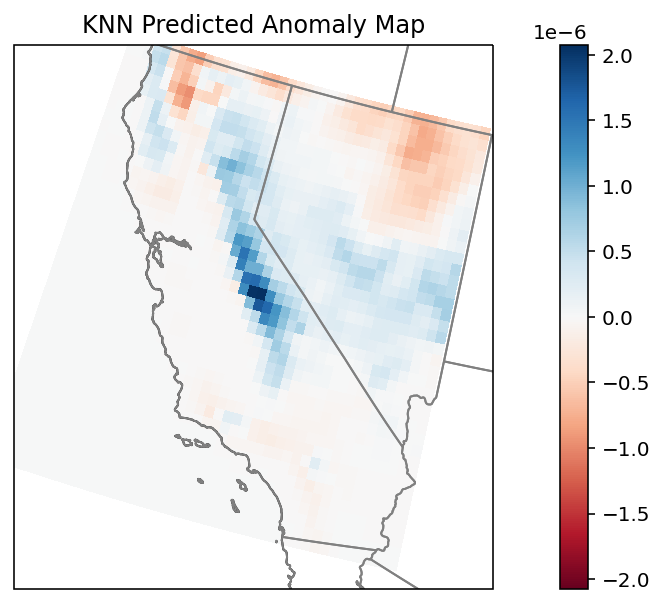

In [339]:
#Map 5: KNN Predicted Anomaly Map
proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection

knn_forecast_ecmwf_a = knn_forecast_ecmwf-ecmwf_mean

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-124, -114, 32, 42]

xr.plot.pcolormesh(knn_forecast_ecmwf_a,transform=proj_dta, ax = ax, cmap='RdBu')
ax.coastlines();
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_extent(extent)
ax.set_title('KNN Predicted Anomaly Map')

 f_critical = 2.61


Text(0.5, 1.0, 'KNN Prediction, Variance Test')

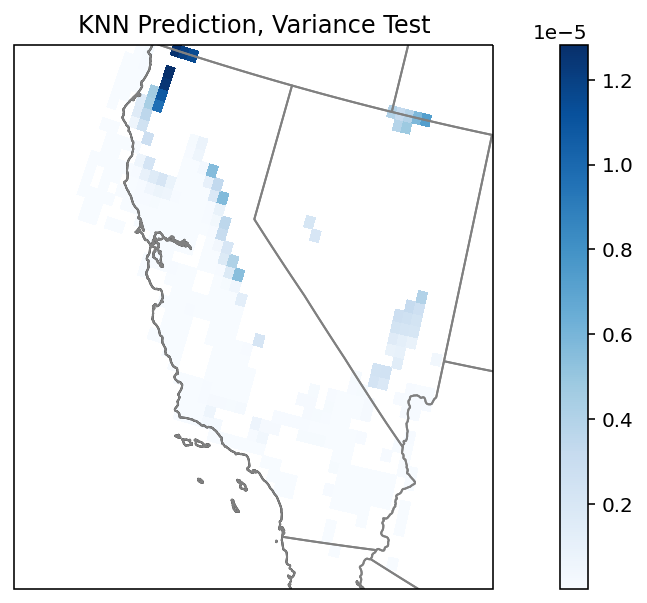

In [340]:
#Map 6: variance difference test, over each data point
knn_i = knn_list[K:].values

knn_ecmwf_var = ecmwf_wyr_array[knn].var(dim = 'T')
knn_ecmwf_var = knn_ecmwf_var.where(knn_ecmwf_var != 0)
knn_i_ecmwf_var = ecmwf_wyr_array[knn_i].var(dim = 'T')
knn_i_ecmwf_var = knn_i_ecmwf_var.where(knn_i_ecmwf_var != 0)
knn_ecmwf_var_test = knn_i_ecmwf_var/knn_ecmwf_var
knn_i_ecmwf_var_test = knn_ecmwf_var/knn_i_ecmwf_var
knn_ecmwf_var_test_max = xr.ufuncs.maximum(knn_ecmwf_var_test, knn_i_ecmwf_var_test)

#Calculate test statistic
Nx = np.count_nonzero(knn)
Ny = np.count_nonzero(knn_i)
alpha = 0.05
f_05 = stats.f.ppf(1-alpha/2, Nx - 1, Ny - 1)
print(' f_critical = {:4.2f}'.format(f_05))

#Snow Map with location filtered according to test statistic
proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-124, -114, 32, 42]

xr.plot.pcolormesh(knn_forecast_ecmwf.where(knn_ecmwf_var_test_max>f_05).where(knn_forecast_ecmwf_a != 0),transform=proj_dta, ax = ax, cmap='Blues')
ax.coastlines();
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_extent(extent)
ax.set_title('KNN Prediction, Variance Test')

Text(0.5, 1.0, 'KNN Prediction, Difference in Means Test')

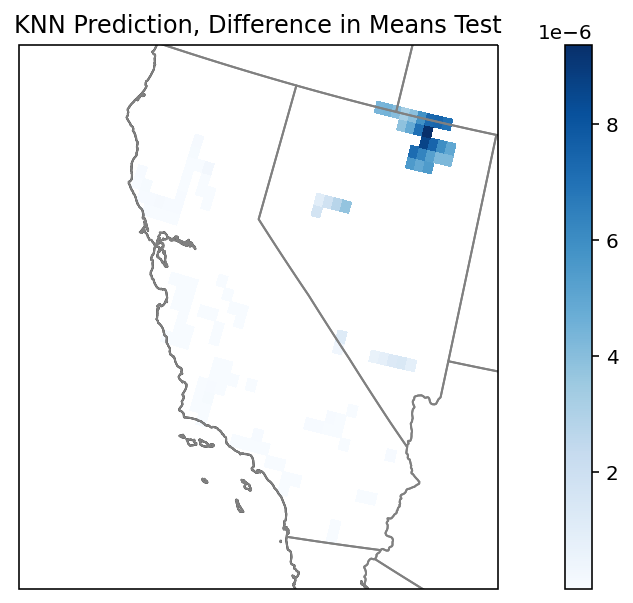

In [369]:
#Map 7: Difference in means test, over each data point
knn_i = np.argsort((n34_JJA_cut - n34_JJA[-2])**2)
knn_i = knn_i[K:].values
df = Nx + Ny - 2

knn_ecmwf_mean = ecmwf_wyr_array[knn].mean(dim = 'T')
knn_ecmwf_mean = ecmwf_wyr_array[knn].mean(dim = 'T').where(knn_ecmwf_mean != 0)
knn_i_ecmwf_mean = ecmwf_wyr_array[knn_i].mean(dim = 'T')
knn_i_ecmwf_mean = ecmwf_wyr_array[knn_i].mean(dim = 'T').where(knn_i_ecmwf_mean != 0)

pooled_var = ((Nx - 1)*knn_ecmwf_var + (Ny - 1)*knn_i_ecmwf_var)/(Nx + Ny - 2)
ecmwf_t = (knn_ecmwf_mean - knn_i_ecmwf_mean)/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
ecmwf_p = 2*(1-stats.t.cdf(np.abs(ecmwf_t), df=df))

#Anomaly Map with location filtered according to test statistic
proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-124, -114, 32, 42]

xr.plot.pcolormesh(knn_forecast_ecmwf.where(ecmwf_p < 0.05).where(knn_forecast_ecmwf != 0), transform=proj_dta, ax = ax, cmap='Blues')
ax.coastlines();
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_extent(extent)
ax.set_title('KNN Prediction, Difference in Means Test')

Text(0.5, 1.0, 'KNN Prediction, Permutation Test Filtered')

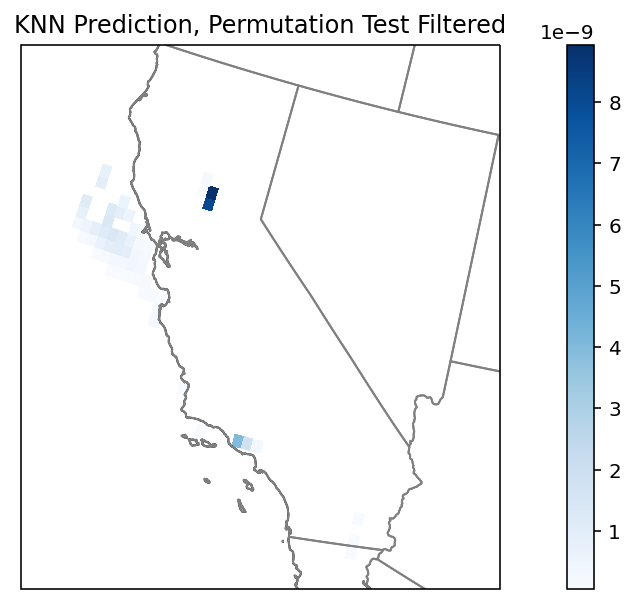

In [342]:
# Map 8: Anomaly Map, filtered according to permutation test

ts_star = knn_ecmwf_mean - knn_i_ecmwf_mean

mc = 1000
ts = np.empty([mc, 39, 43])
for ii in range(0, mc):
    perm_index = np.random.permutation(40)
    knn_r = ecmwf_wyr_array[perm_index]
    ts[ii] = np.mean(knn_r[:10], axis=0) - np.mean(knn_r[10:], axis = 0)

perm_f = np.empty([39,43])
for ii in range (0, 39):
    for jj in range (0, 43):
        perm_f[ii, jj] = np.count_nonzero(ts_star[ii,jj].values < ts[:,ii,jj])/1000
    
perm_p = np.minimum(perm_f, 1-perm_f)

#Prediction Map with location filtered according to test statistic
proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-124, -114, 32, 42]

xr.plot.pcolormesh(knn_forecast_ecmwf.where(perm_p < 0.025).where(knn_forecast_ecmwf != 0),transform=proj_dta, ax = ax, cmap='Blues')
ax.coastlines();
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_extent(extent)
ax.set_title('KNN Prediction, Permutation Test Filtered')

### CA DWS CSV Files -- Individual Stations:
   Paired up between one station measuring snow, and another measuring the full natural flow, i.e. of a river taking runoff water from the snow station as its source. I am only considering the relationship between the snow levels of each station to its relevant river, not to any of the others.
   
Each of the rivers selected is also very relevant to California/LA water infrastructure: the San Joaquin River is the source for much of the Central Valley's agriculture industry, the Kern river leads into the California Aqueduct, and the Owens river connects to the L.A. Aqueduct -- a fact that led directly to the dramatic draining of Owens lake when it was first built, and has been continuously controversial since.

#### 1a. Piute Pass (snow)

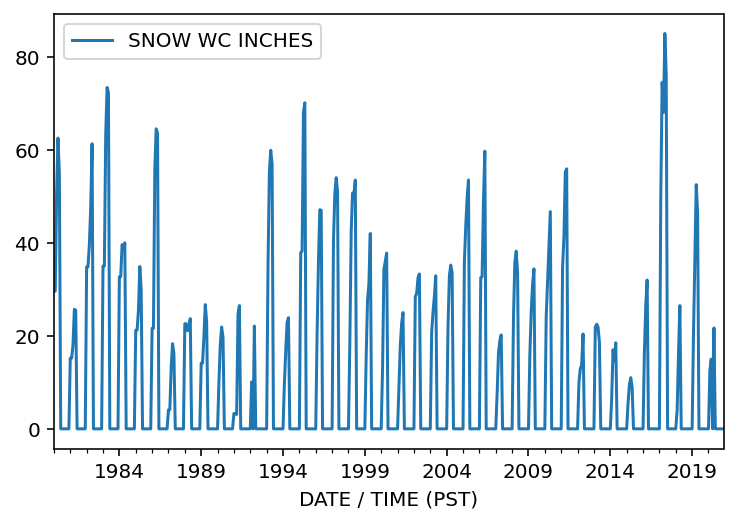

In [343]:
PPS = pd.read_csv('Data/PPS.csv', index_col = 0, parse_dates=True)
PPS = PPS.drop(columns = 'Unnamed: 2')
PPS = PPS.where(PPS != '--', other = 0)
PPS=PPS.astype(float)
PPS.plot()

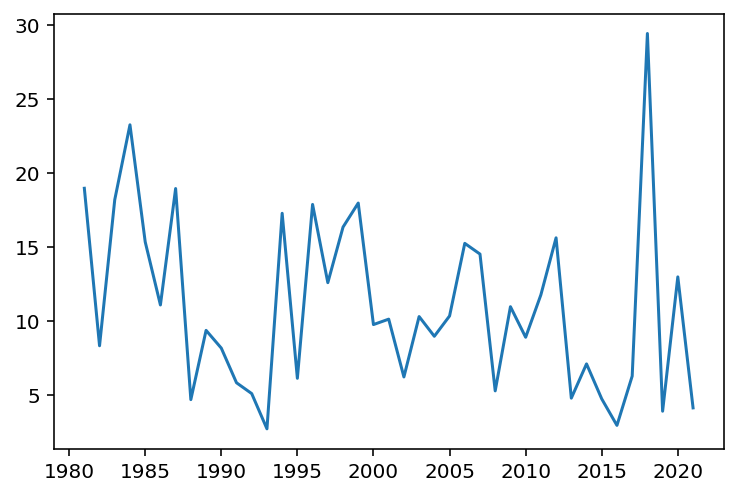

In [344]:
#Code in water year
PPS_shift = PPS.shift(periods = 3, fill_value = 0)
PPS_wyr = pd.DataFrame.resample(PPS_shift,'Y').mean()
fig, axs = plt.subplots(figsize = (6,4))
plt.plot(PPS_wyr)

#### 1b. San Joaquin River below Friant (runoff)

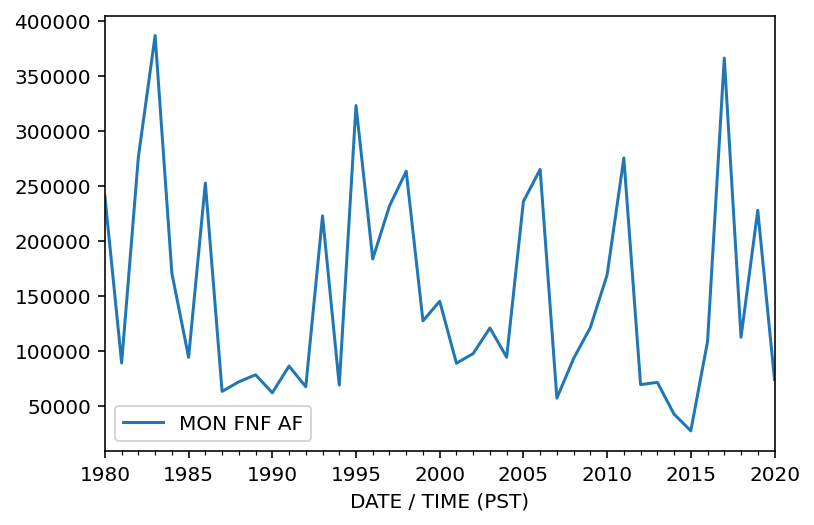

In [345]:
SJF = pd.read_csv('Data/SJF.csv', index_col = 0, parse_dates=True)
SJF = SJF.drop(columns = 'Unnamed: 2')
SJF = SJF.where(SJF != '--', other = 0)
SJF = SJF.replace(',','')
SJF['MON FNF AF'] = SJF['MON FNF AF'].str.replace(',', '').astype(float)
SJF_shift = SJF.shift(periods = 3, fill_value = 0)
SJF_wyr = pd.DataFrame.resample(SJF_shift,'Y').mean()
SJF_wyr.plot()

#### 2a. Bighorn Plateau (snow)

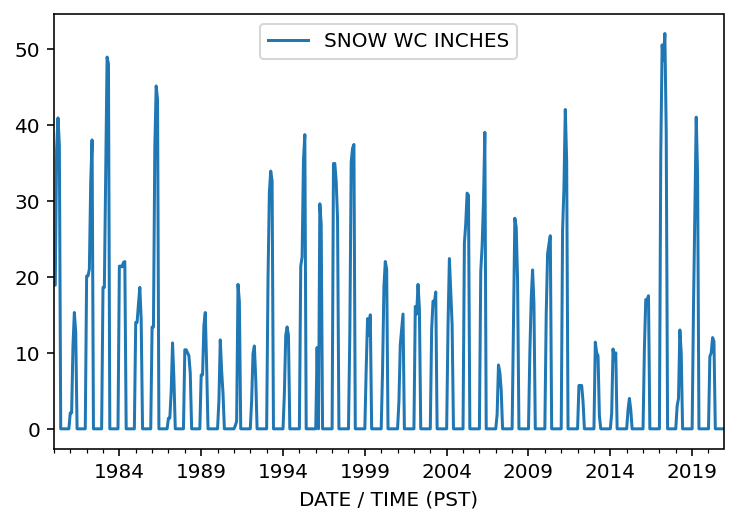

In [346]:
BGH = pd.read_csv('Data/BGH.csv', index_col = 0, parse_dates=True)
BGH = BGH.drop(columns = 'Unnamed: 2')
BGH = BGH.where(BGH != '--', other = 0)
BGH = BGH.astype(float)
BGH.plot()

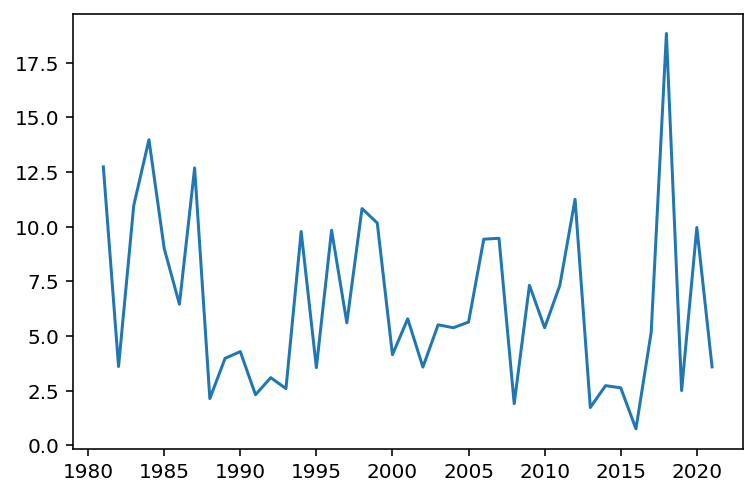

In [347]:
BGH_shift = BGH.shift(periods = 3, fill_value = 0)
BGH_wyr = pd.DataFrame.resample(BGH_shift,'Y').mean()
fig, axs = plt.subplots(figsize = (6,4))
plt.plot(BGH_wyr)

#### 2b. Kern River below Isabella (runoff)

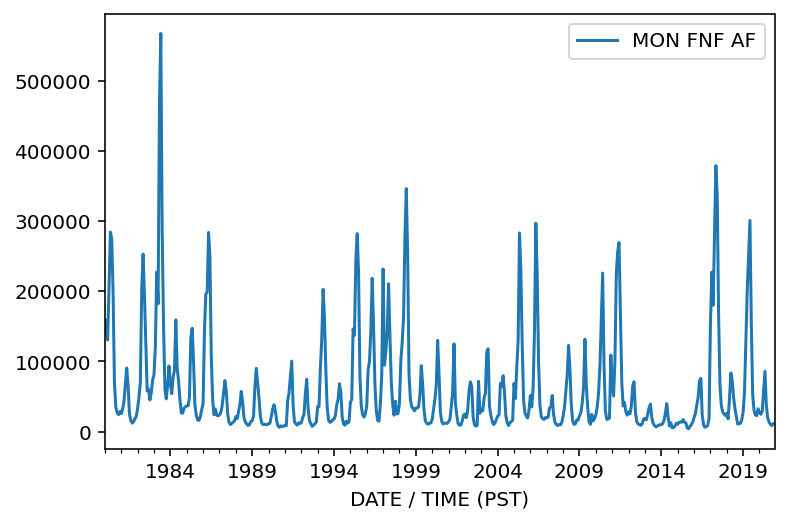

In [348]:
KRI = pd.read_csv('Data/KRI.csv', index_col = 0, parse_dates=True)
KRI = KRI.drop(columns = 'Unnamed: 2')
KRI = KRI.where(KRI != '--', other = 0)
KRI = KRI.replace(',','')
KRI['MON FNF AF'] = KRI['MON FNF AF'].str.replace(',', '').astype(float)
KRI.plot()

In [349]:
KRI_shift = KRI.shift(periods = 3, fill_value = 0)
KRI_wyr = pd.DataFrame.resample(KRI_shift,'Y').mean()

#### 3a: Bishop Lake (snow)

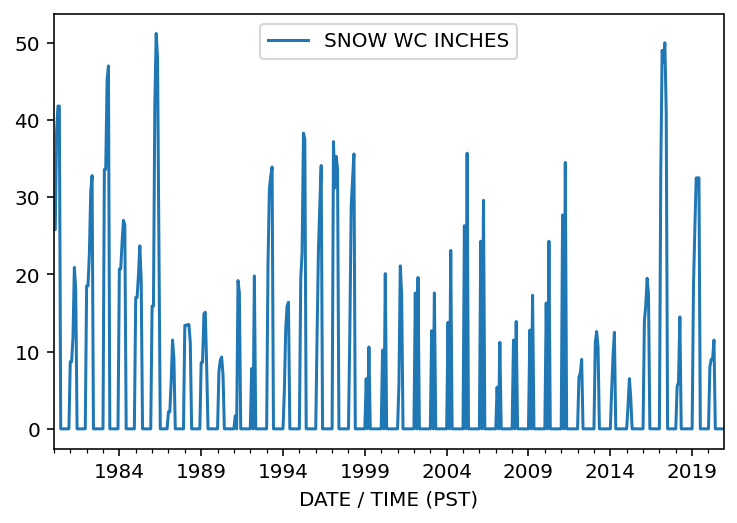

In [350]:
BSP = pd.read_csv('Data/BSP.csv', index_col = 0, parse_dates=True)
BSP = BSP.drop(columns = 'Unnamed: 2')
BSP = BSP.where(BSP != '--', other = 0)
BSP = BSP.astype(float)
BSP.plot()

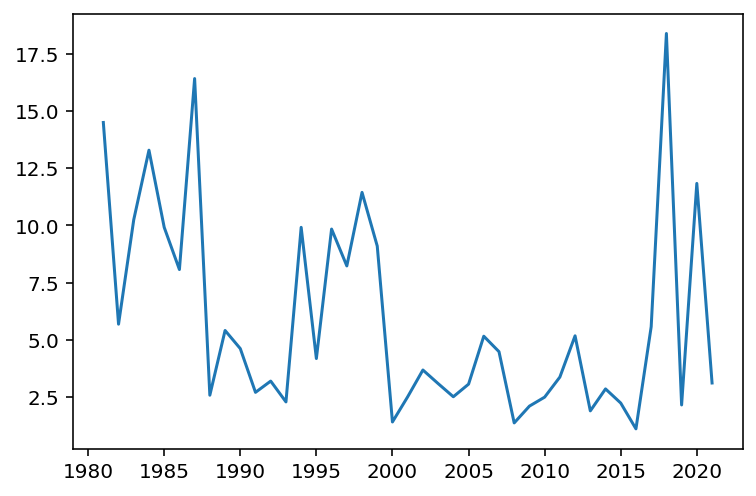

In [351]:
BSP_shift = BSP.shift(periods = 3, fill_value = 0)
BSP_wyr = pd.DataFrame.resample(BSP_shift,'Y').mean()
fig, axs = plt.subplots(figsize = (6,4))
plt.plot(BSP_wyr)

#### 3b: Owens River - Long Valley (runoff)

In [352]:
OWL = pd.read_csv('Data/KRI.csv', index_col = 0, parse_dates=True)
OWL = OWL.drop(columns = 'Unnamed: 2')
OWL = OWL.where(OWL != '--', other = 0)
OWL = OWL.replace(',','')
OWL['MON FNF AF'] = OWL['MON FNF AF'].str.replace(',', '').astype(float)
OWL_shift = OWL.shift(periods = 3, fill_value = 0)
OWL_wyr = pd.DataFrame.resample(OWL_shift,'Y').mean()

### Station Correlations: ###

#### Collected Snow Data Correlations with Snow Flux Data at Respective Coordinates: ####

In [354]:
#Correlation between ecmwf flux data for Piute Pass and Piute Pass collected data
PPS_ecmwf = ecmwf_wyr_array.sel(Y = 37.240, X = -118.687, method = 'nearest')
PPS_wyr_cut = PPS_wyr[:-1]
PPS_ecmwf_corr = cor(PPS_ecmwf.values, PPS_wyr_cut.to_numpy().reshape(40))
print ('Piute Pass Snowfall Flux Correlation with Collected Data:', PPS_ecmwf_corr)

BGH_ecmwf = ecmwf_wyr_array.sel(Y = 36.61500, X = -118.37700, method = 'nearest')
BGH_wyr_cut = BGH_wyr[:-1]
BGH_ecmwf_corr = cor(BGH_ecmwf.values, BGH_wyr_cut.to_numpy().reshape(40))
print ('Bighorn Plateau Snowfall Flux Correlation with Collected Data:', BGH_ecmwf_corr)

BSP_ecmwf = ecmwf_wyr_array.sel(Y = 37.12300, X = -118.54500, method = 'nearest')
BSP_wyr_cut = BSP_wyr[:-1]
BSP_ecmwf_corr = cor(BSP_ecmwf.values, BSP_wyr_cut.to_numpy().reshape(40))
print ('Bishop Lake Snowfall Flux Correlation with Collected Data:', BSP_ecmwf_corr)

print ('Test Statistic:', 2/np.sqrt(40), " -- correlations statistically significant")

Piute Pass Snowfall Flux Correlation with Collected Data: 0.9786591540829241
Bighorn Plateau Snowfall Flux Correlation with Collected Data: 0.9735802642753201
Bishop Lake Snowfall Flux Correlation with Collected Data: 0.9278756498112374
Test Statistic: 0.31622776601683794  -- correlations statistically significant


#### Snow Correlations with River Flow (yearly): ####

In [355]:
SJF_PPS_corr = cor(SJF_wyr.to_numpy().reshape(41), PPS_wyr.to_numpy().reshape(41))
print ('Piute Pass Snowfall Correlation with San Joaquin River:', SJF_PPS_corr)

KRI_BGH_corr = cor(BGH_wyr.to_numpy().reshape(41), KRI_wyr.to_numpy().reshape(41))
print ('Bighorn Plateau Correlation with Kern River:', KRI_BGH_corr)
                   
OWL_BSP_corr = cor(BSP_wyr.to_numpy().reshape(41), OWL_wyr.to_numpy().reshape(41))
print ('Bishop Lake Correlation with Owens River:', OWL_BSP_corr)

print ('Test Statistic:', 2/np.sqrt(41), " -- correlations statistically significant")


Piute Pass Snowfall Correlation with San Joaquin River: 0.9806588089629186
Bighorn Plateau Correlation with Kern River: 0.9758503483843712
Bishop Lake Correlation with Owens River: 0.9435159939922694
Test Statistic: 0.31234752377721214  -- correlations statistically significant


#### Correlation Lag Graphs: ####

Text(0.5, 0, 'Number of Lag Months')

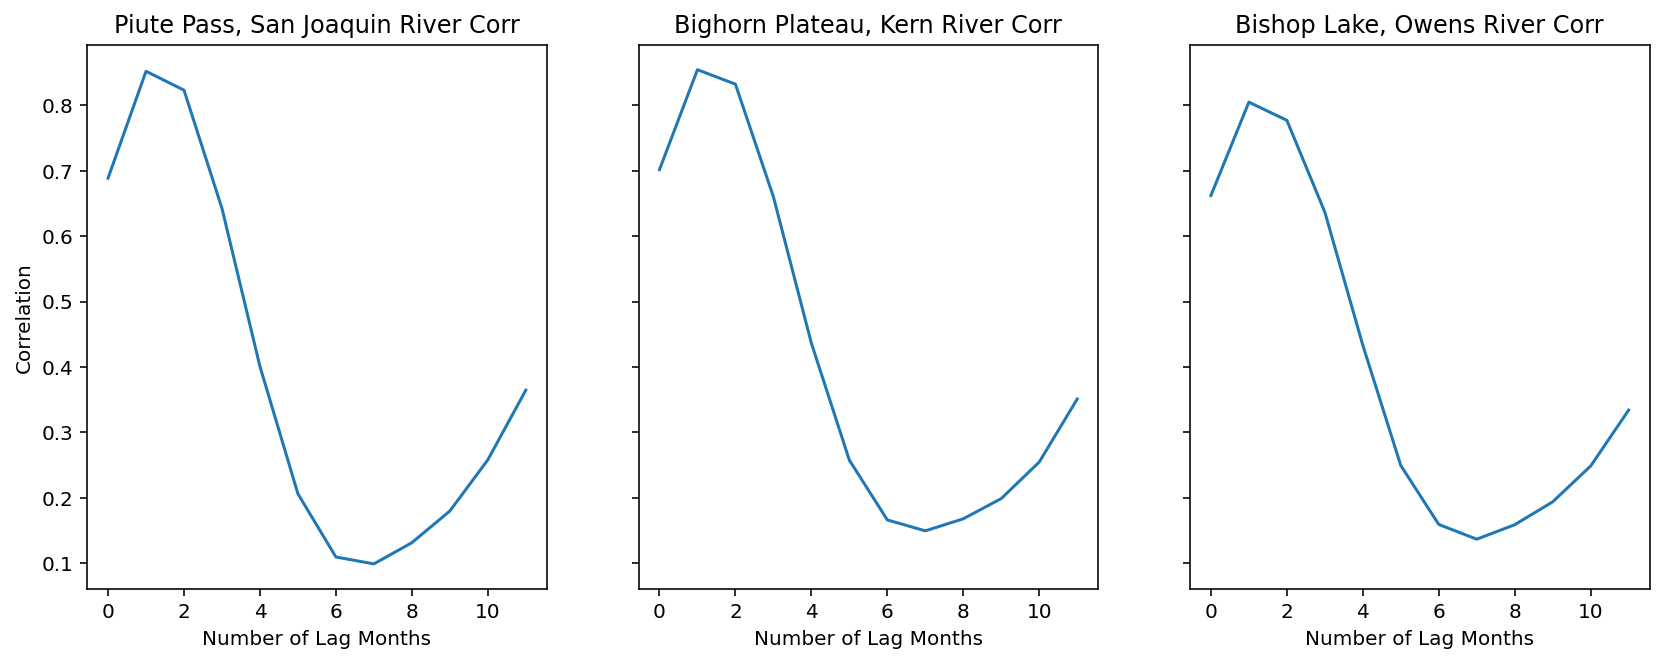

In [356]:
fig, axs = plt.subplots(1, 3, figsize=(14,5), sharey=True)

max_lag = 12
def cgraph(snow, river):
    cc = np.empty((12))
    for lag in range(0, max_lag):
        cc[lag]= cor(snow.to_numpy(), river.shift(periods=-lag).to_numpy())
    return cc

ax = axs[0]       
ax.plot(cgraph(PPS, SJF))
ax.set_title('Piute Pass, San Joaquin River Corr')
ax.set_ylabel('Correlation')
ax.set_xlabel('Number of Lag Months')

ax = axs[1]
ax.plot(cgraph(BGH, KRI))
ax.set_title('Bighorn Plateau, Kern River Corr')
ax.set_xlabel('Number of Lag Months')


ax = axs[2]
ax.plot(cgraph(BSP, OWL))
ax.set_title('Bishop Lake, Owens River Corr')
ax.set_xlabel('Number of Lag Months')



#### Sep Nino 3.4 Correlations with Collected Snow Data: ####

In [365]:
print ('Piute Pass Snowfall Correlation with Sep Nino 3.4:', cor(n34_Sep_cut.values, PPS_wyr.values.reshape(41)))
print ('Bighorn Plateau Snowfall Correlation with Sep Nino 3.4:', cor(n34_Sep_cut.values, BGH_wyr.values.reshape(41)))
print ('Bishop Lake Snowfall Correlation with Sep Nino 3.4:', cor(n34_Sep_cut.values, BSP_wyr.values.reshape(41)))
print ('Test Statistic:', 2/np.sqrt(41), " -- correlations not statistically significant")

Piute Pass Snowfall Correlation with Sep Nino 3.4: 0.018656606933077656
Bighorn Plateau Snowfall Correlation with Sep Nino 3.4: 0.017168416025218333
Bishop Lake Snowfall Correlation with Sep Nino 3.4: 0.05371568112077138
Test Statistic: 0.31234752377721214  -- correlations not statistically significant


### Linear Regressions: ###

In [357]:
#Linear Regression based on Sept Nino 3.4 an
Nx = len(n34_Sep_cut)
def lr_n34_Sep_0(x):
    X_trend = np.empty((Nx,2))
    X_trend[:, 1] = n34_Sep_cut
    X_trend[:, 0] = 1
    beta = inv(X_trend.T@X_trend)@X_trend.T@x.values
    x_regression_0 = beta[1]*n34_Sep.values[-1] + beta[0]
    return x_regression_0
def lr_n34_Sep(x):
    Nx = len(n34_Sep_cut)

    X_trend = np.empty((Nx,2))
    X_trend[:, 1] = n34_Sep_cut
    X_trend[:, 0] = 1
    beta = inv(X_trend.T@X_trend)@X_trend.T@x.values
    x_regression = X_trend@beta
    return x_regression

def lr_n34_Sep_interval(x):
    X_trend = np.empty((Nx,2))
    X_trend[:, 1] = n34_Sep_cut
    X_trend[:, 0] = 1
    beta = inv(X_trend.T@X_trend)@X_trend.T@x.values
    
    sigma_hat_lr = np.std(lr_n34_Sep(x)-x, ddof=2).values
    t_20 = stats.t.ppf(1 - 0.2/2, df = Nx - 1)
    Xp = np.array([n34_Sep.values[-1], 1])
    Xfactor = np.sqrt(1. + Xp.T@inv(X_trend.T@X_trend)@Xp)
    pi_80_lr = sigma_hat_lr*t_20*Xfactor
    return pi_80_lr

Text(0, 0.5, 'Piute Pass Water Year Snow Average Water Content')

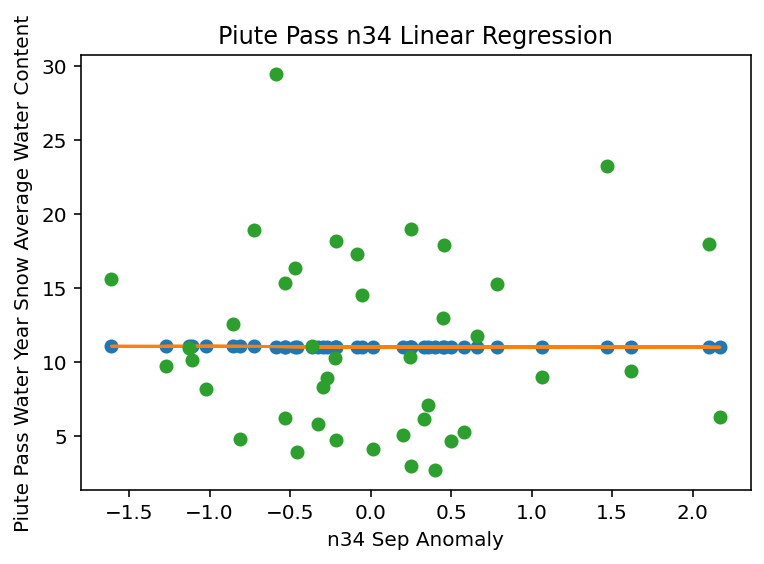

In [370]:
lr_n34_Sep_0(PPS_wyr), lr_n34_Sep_interval(PPS_wyr)
plt.plot(n34_Sep_cut, lr_n34_Sep(PPS_wyr), 'o')
plt.plot(n34_Sep_cut, lr_n34_Sep(PPS_wyr))
plt.plot(n34_Sep_cut, PPS_wyr, 'o')
plt.title('Piute Pass n34 Linear Regression')
plt.xlabel('n34 Sep Anomaly')
plt.ylabel('Piute Pass Water Year Snow Average Water Content')

Text(0, 0.5, 'Water Year Average Snow Water Content, inches')

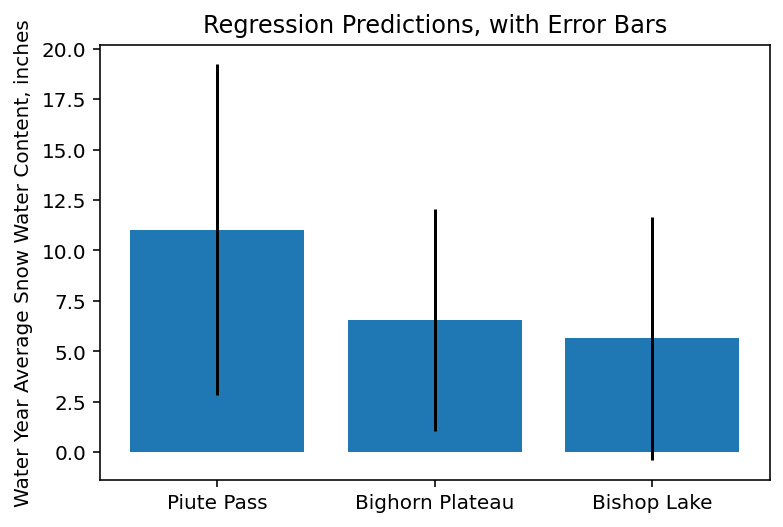

In [359]:
plt_stations = ['Piute Pass', 'Bighorn Plateau', 'Bishop Lake']
plt_predictions = np.concatenate((lr_n34_Sep_0(PPS_wyr), lr_n34_Sep_0(BGH_wyr), lr_n34_Sep_0(BSP_wyr)))
plt_errors = np.concatenate((lr_n34_Sep_interval(PPS_wyr), lr_n34_Sep_interval(BGH_wyr), lr_n34_Sep_interval(BSP_wyr)))
plt.bar(plt_stations, plt_predictions, yerr = plt_errors)
plt.title('Regression Predictions, with Error Bars')
plt.ylabel('Water Year Average Snow Water Content, inches')